In [28]:
from collections import Counter
from typing import List
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd
import pymongo
import matplotlib.pyplot as plt

In [2]:
def get_question_txt() -> list:
    client = pymongo.MongoClient(host="localhost", port=27017)
    db = client["stackoverflow"]
    ai = pymongo.collection.Collection(database=db, name="ai_questions")
    cursor = ai.find({})
    return [i["question"] for i in cursor]

In [7]:
txt = get_question_txt()
len(txt)

500

In [21]:
re_punc = re.compile("[%s]" % re.escape(string.punctuation))


def tokenize_txt(txt: list, most_common: int = 50) -> dict:
    full_corp = []
    for doc in txt:
        tok = word_tokenize(doc)
        tok = [w.lower() for w in tok]
        tok = [re_punc.sub("", w) for w in tok]
        tok = [word for word in tok if word.isalpha()]
        stop_words = set(stopwords.words("english"))
        tok = [w for w in tok if w not in stop_words]
        for w in tok:
            full_corp.append(w)
        
    cnt = Counter(full_corp)
    w = {
        "word": [],
        "count": []
    }
    for k, v in cnt.most_common(most_common):
        w["word"].append(k)
        w["count"].append(v)
    return w

In [23]:
corp = tokenize_txt(txt)

In [25]:
df = pd.DataFrame(corp)
df.head()

,word,count
0,would,282
1,nt,272
2,like,234
3,algorithm,223
4,ai,205


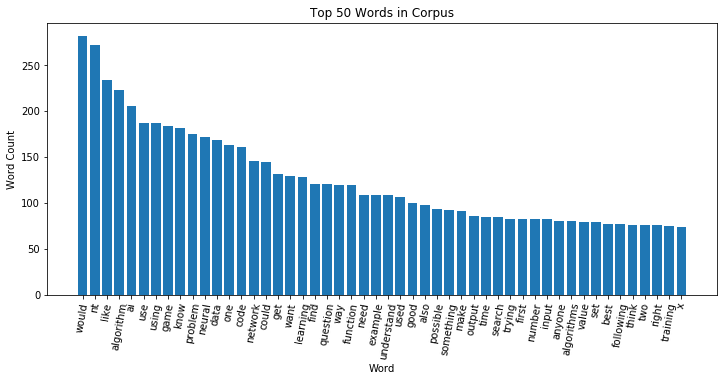

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
ax.bar(x=df["word"], height=df["count"])
plt.xticks(rotation=80)
ax.set(xlabel="Word", ylabel="Word Count")
ax.set_title("Top 50 Words in Corpus")
plt.show()